170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


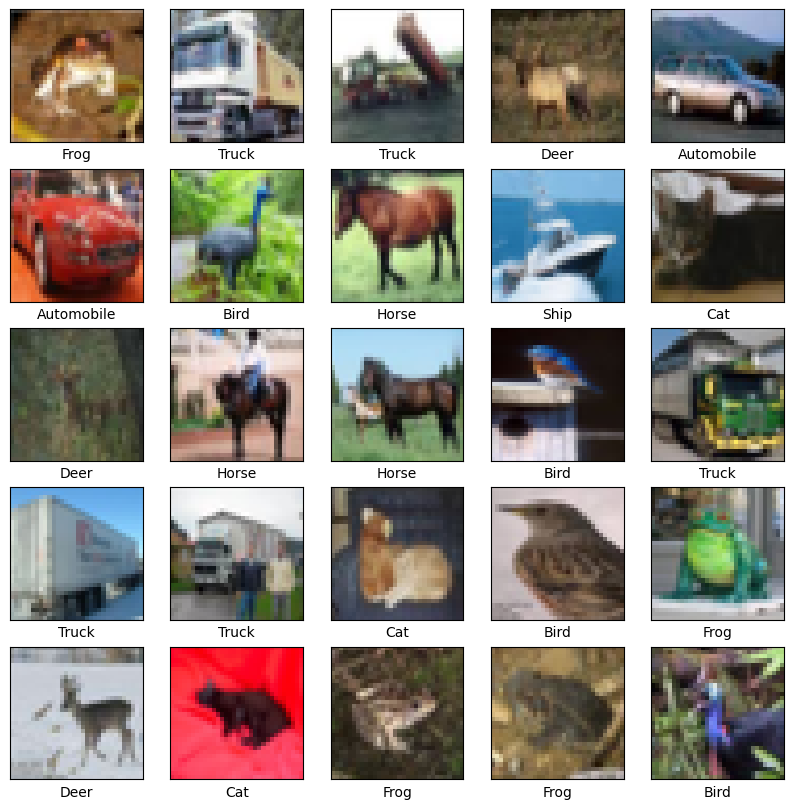

d:\abhijeet files\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.3436 - loss: 1.7662 - val_accuracy: 0.5470 - val_loss: 1.2637
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5693 - loss: 1.2100 - val_accuracy: 0.6225 - val_loss: 1.0777
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6420 - loss: 1.0256 - val_accuracy: 0.6511 - val_loss: 1.0025
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6731 - loss: 0.9318 - val_accuracy: 0.6731 - val_loss: 0.9422
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7027 - loss: 0.8520 - val_accuracy: 0.6742 - val_loss: 0.9296
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7245 - loss: 0.7851 - val_accuracy: 0.6847 - val_loss: 0.9064
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7421 - loss: 0.7359 - val_accuracy: 0.7054 - val_loss: 0.8663
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7571 -

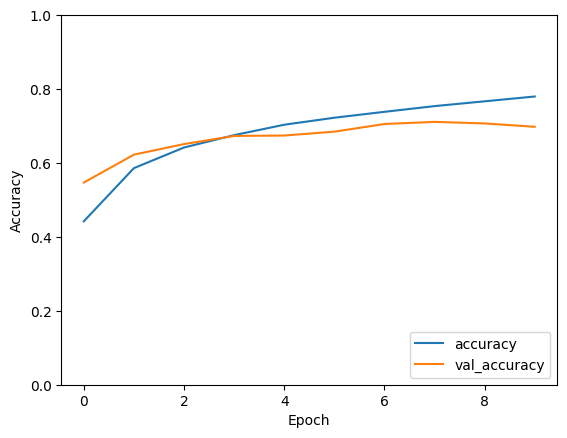

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


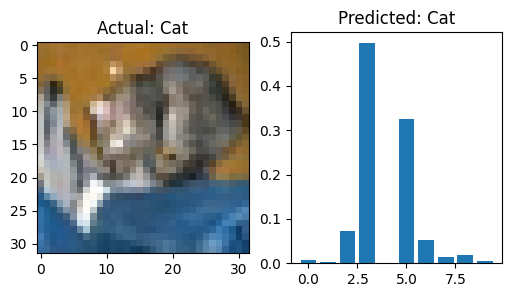

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display a few examples from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Make predictions
predictions = model.predict(x_test)

# Plot the first image in the test set and its predicted label
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"Actual: {class_names[y_test[0][0]]}")

plt.subplot(1,2,2)
plt.bar(range(10), tf.nn.softmax(predictions[0]))
plt.title(f"Predicted: {class_names[np.argmax(predictions[0])]}")
plt.show()


Text(0.5, 1.0, 'Actual: Cat')

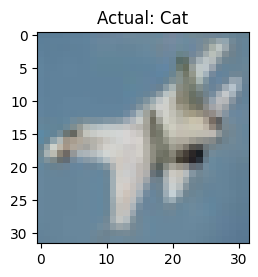

In [15]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(x_test[10])
plt.title(f"Actual: {class_names[y_test[0][0]]}")

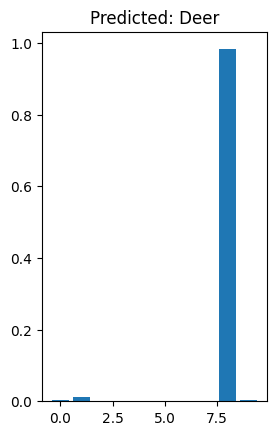

In [23]:
plt.subplot(1,2,2)
plt.bar(range(10), tf.nn.softmax(predictions[2]))
plt.title(f"Predicted: {class_names[np.argmax(predictions[10])]}")
plt.show()
